In [2]:
#importing my packages
import patatmo
import geopandas as gpd
import pandas as pd
import contextily as ctx
import time
import os
import datetime
from datetime import datetime

In [3]:
#my credentials, had to remove them because I published this online
username = '...'
password = '...'
client_id = '...'
client_secret = '...'

In [4]:
os.chdir('C:\\Users\donna\\testje')
print(os.getcwd())

# my netatmo connect developer credentials
credentials = {"password" : password ,
               "username" : username,
               "client_id" : client_id,
               "client_secret": client_secret
              }

# configure the authentication
authentication = patatmo.api.authentication.Authentication(
    credentials=credentials,
    tmpfile = "temp_auth.json"
)

# providing a path to a tmpfile to store tokens for later reuse
# This saves time because no new tokens have to be requested.
# New tokens are then only requested if the old ones expire.

# create a api client
client = patatmo.api.client.NetatmoClient(authentication)

# lat/lon outline of The Hague/The Netherlands
hague_region = {
    "lat_ne" : 52.135036,
    "lat_sw" : 52.014848,
    "lon_ne" : 4.42249,
    "lon_sw" : 4.184998,
}

# issue the API request
hague = client.Getpublicdata(region = hague_region)


C:\Users\donna\testje


In [10]:
df = hague.dataframe()
type(df)

pandas.core.frame.DataFrame

In [28]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df['longitude'], y=df['latitude']))
gdf.crs = {'init': 'epsg:4326'}

C:\Users\donna\anaconda3\envs\bep\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


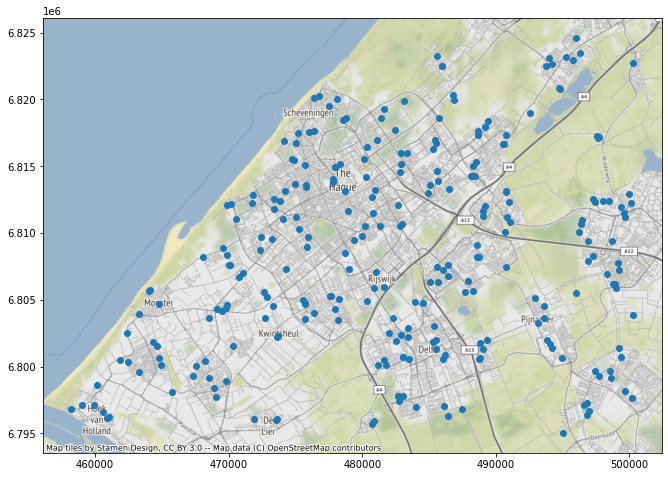

In [29]:
ax = gdf.to_crs(epsg=3857).plot(figsize=(18,8))
ctx.add_basemap(ax=ax)

C:\Users\donna\anaconda3\envs\bep\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


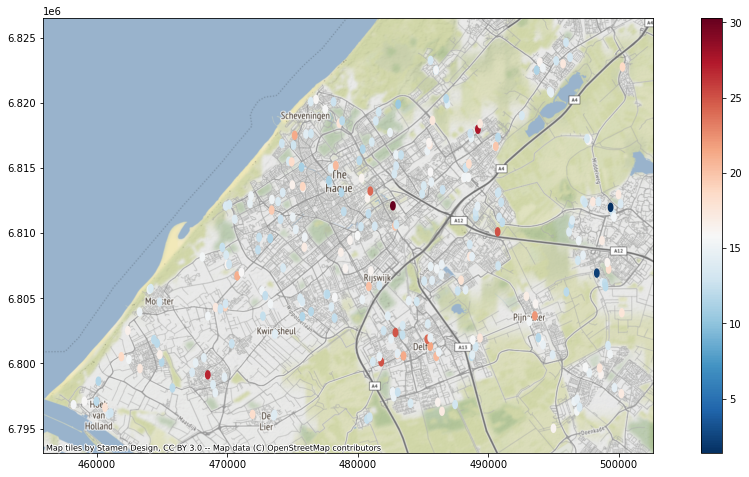

In [30]:
ax = gdf.set_geometry(gdf.geometry.buffer(.002)).to_crs(epsg=3857).plot(column='temperature', figsize=(17,8), legend=True, cmap='RdBu_r')
ctx.add_basemap(ax=ax)